# Project 2: Area Calculater

Write an alorithm that can calcualte the area of any irregular polygon whose side sides are in the dimension of m    
Report the Output in Hectors
Extra: Enable the user to see what change in boarder dimensions will be required for a desired land area - this is useful because it depends on shape data of the polygon 

# Script Layout
1. Organise the Data Inputs
2. Perfrom Area Calcualtion
3. Clearly display Outputs

# Assumptions and Constraints
1. Considers only polygons whos sides are straight edges
2. DMS convesion used for all angles
3. All angles measured from True North (TN) only in the positive direction 
4. Flat Ground Surface - does not account for hills and other surface irregularities



In [16]:
# 1. Organise the Data Inputs 

# Import the Libraries
import numpy as np
import string 
import matplotlib.pyplot as plt

In [17]:
#Confirm the number if sides and respective angles from True North (TN)

vetx_num = int(input(f"PLEASE ENTER THE NUMBER OF VERTICES:")) # The number of times to ask for the user to enter data
#vetx_num = 6
vetx_name = np.array(list(string.ascii_uppercase))
vetx_name = vetx_name[:vetx_num]
 # Rcall: For a 2D polygon: #vertices = #of sides

# When we know the vertices, we can name the sides
side_name = []
for i in range(0,len(vetx_name)):
  if i < len(vetx_name)-1:
    side_name.append(vetx_name[i]+vetx_name[i+1])
  elif i == len(vetx_name)-1:
    side_name.append(vetx_name[i]+vetx_name[0])
print(side_name)


#Entering the side lengths
side_length = []
# User inputting the Side Lengths 
for name in side_name:
  side_length.append(float(input(f"Please enter the length if side {name} (in meters):")))
  #side_length = [267.98, 56.48, 12.25, 363.02, 136.66, 458.55]

#froming np arrays out of the input data:
side_name = np.array(side_name)
side_length = np.array(side_length)

print(side_length)


['AB', 'BC', 'CD', 'DE', 'EA']
[34. 34. 23. 57. 45.]


In [18]:
# User inputting the Side Angles (from TN)

#User enter as string then convert to degrees and store in a vector, Theta
side_Theta = []
for name in side_name:
  side_Theta.append(str(input(f"Please enter the angle if side {name} (in DD.MM.SS format):")))
#side_Theta = ['279.19.40', '326.25.50', '340.59.10', '2.22.10', '103.35.20', '160.39.50']


#Converting the user input to degrees:
  
# Method 1: Separating the values from Scratch

Theta_DD = np.array([])
Theta_MM = np.array([])
Theta_SS = np.array([])
period = np.array([])


#Take note of where all the periods are
for ii in range(0, len(side_Theta)):
  string = side_Theta[ii]
  for jj in range(0,len(string)):
    if string[jj] == '.':
      jj = int(jj)
      period = np.append(period,jj) 
period_rows = int(len(period)/2)
period = period.reshape(period_rows,2)
period = period.astype(int)

k = 0
for string_i in range(0, len(side_Theta)):
  string = side_Theta[string_i]
  Theta_DD = np.append(Theta_DD, int(string[0:period[k,0]]))
  Theta_MM = np.append(Theta_MM, int(string[period[k,0] + 1:period[k, 1]]))
  Theta_SS = np.append(Theta_SS, int(string[period[k, 1]+1:len(string)+1]))
  k += 1
Theta = Theta_DD + Theta_MM/60 + Theta_SS/120

print("Theta_DD:", Theta_DD)
print("Theta_MM:", Theta_MM)
print("Theta_SS:", Theta_SS)
print("Theta:", Theta) 
# Method 2: Using the in-bulit string separator/slicing function

Theta_DD: [56. 34. 34. 34.  6.]
Theta_MM: [45. 23. 45. 34. 64.]
Theta_SS: [56. 13. 23. 34. 45.]
Theta: [57.21666667 34.49166667 34.94166667 34.85        7.44166667]


In [19]:
#We now need to adjust the inputs for the calcualtions

#Reverse the order of the lable vectors and the Theta vectors

#Vertex Flip
print(vetx_name)
vetx_name_flip = np.flip(vetx_name)
print(vetx_name_flip)


#The Names
print(side_name)
side_name_flip = np.flip(side_name)
print(side_name_flip)

#Flip the Names eg: "AB" becomes "BA"
side_name_flip = []
for combo in side_name:
    for letter in range(len(combo)):
        if letter == 1:
            side_name_flip.append(combo[letter]+combo[letter-1])
print(side_name_flip)


#The LENGTHS
side_length = np.flip(side_length)

#The ANGLES
Theta = np.flip(Theta)




['A' 'B' 'C' 'D' 'E']
['E' 'D' 'C' 'B' 'A']
['AB' 'BC' 'CD' 'DE' 'EA']
['EA' 'DE' 'CD' 'BC' 'AB']
['BA', 'CB', 'DC', 'ED', 'AE']


# Mathematical Strategy for Finding Equations AB, BC etc
Where the y axis is TN:
1. Set Point A as the origin (0,0)
2. From there, use the bearing and length AB to find B
3. At point B, use the bearing and length BC to find C
4. Repeat until all points are mapped
5. Find the equations of all lines


# MAIN FUNCTIONS TO CREATE
1. Takes in a TN Bearing, Length and a start point (x,y), and OUTPUTS and end point (x,y) 
2. Takes in a START and END point (x,y) and (x,y) and OUTPUTS the line equation
3. Takes in 1 line equation and OUTPUTS the EQUATION of the line perpendicular to the given line equation
4. Takes 2 line equations and outputs there INTERSECTION POINT (x,y)
5. Takes in a set of bases, b and a heights, h outputs a total polygon area


[ 7.44166667 34.85       34.94166667 34.49166667 57.21666667]
[82.55833333 55.15       55.05833333 55.50833333 32.78333333]
[1.44091474 0.96254908 0.9609492  0.96880318 0.57217711]
(5,)
(5,)
[[  5.82825267  38.39975915  51.57282868  70.82656514  99.41118605]
 [ 44.62097568  91.39807442 110.25199282 138.27508387 156.68484887]]
(2, 5)


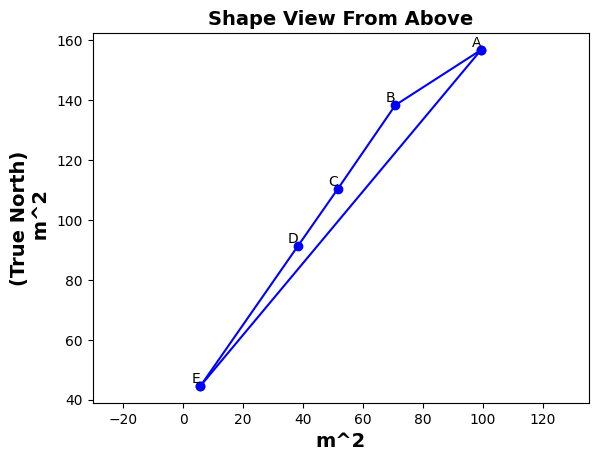

In [20]:
#Finding the POINTS ON THE x-y plane
#Set A as the origin
#Our data is in the form of Polar Coordinates - BUT we measure the angle using TN as the reference
#In TN Bearings POSITIVE angles are measured CLOCKWISE from the Y-AXIS and NEGATIVE angles are measured ANTI-CLOCKWISE from the Y-AXIS
#In Polar Coordinates, POSITIVE angles are measured ANTI-CLOCKWISE from the X-AXIS and NEGATIVE angles are measured clockwise from the x-axis

#Function to convert from TN Bearings TO Polar Coordinates
def bearing_to_cart(angle):
    result = np.all(angle >= 0)
    angle_cart = []
    if result == True: # if the TN Bearning is positive ONLY
        for bearing in angle:
            #print(bearing)
            #Moving clockwise from Q1 -> Q4 -> Q3 -> Q2
            if bearing <= 90: # First Quadrant, Q1
                angle_cart.append(90 - bearing)

            if bearing > 90 and bearing <= 180: #Q4
                angle_cart.append(360-(bearing-90))

            if bearing > 180 and bearing <= 270: #Q3
                 angle_cart.append((270-bearing)+180)

            if bearing > 270 and bearing <= 360: #Q2
                 angle_cart.append((360-bearing)+90)
        return np.deg2rad(angle_cart) #np sine and cos take in values as radians

#FUNCTION CALCULATE POINTS
    
def point_finder(distance, angle_xy): 

        #Finding unadjusted points
         # The first point sold for is point B! (AB's length and angle information is used to find coordinate B)
         x_linedistance = distance*np.cos(angle_xy)
         y_linedistance = distance*np.sin(angle_xy)

        #Making Sure that the distances between each of the points was correct
        #by shifting the reference point from the origin to each successive point
         x_new = [x_linedistance[0]]
         y_new = [y_linedistance[0]]
         
         for i in range(1,len(x_linedistance)):
              x_new.append(x_new[i-1]+x_linedistance[i])
              y_new.append(y_new[i-1]+y_linedistance[i])

                   
         #x_cordinate = x_linedistance
         #y_cordinate = y_linedistance

         x_cordinate = x_new
         y_cordinate = y_new

         x_cordinate = np.array(x_cordinate)
         print(np.shape(x_cordinate))

         y_cordinate = np.array(y_cordinate)
         print(np.shape(y_cordinate))
         
         cordinate = [x_cordinate, y_cordinate]
         cordinate = np.array(cordinate)
         return cordinate

#Execute the fucntions
Theta_xy = bearing_to_cart(Theta) 
print(Theta)
print(np.rad2deg(Theta_xy))
print(Theta_xy)

coordinates_xy = point_finder(side_length,Theta_xy) 
#Check values
print(coordinates_xy)
print(np.shape(coordinates_xy))

#Plot the land area points for sanity check
x_values = coordinates_xy[0,:]
y_values = coordinates_xy[1,:]

plt.plot(x_values,y_values, color='blue' , marker='o')
plt.plot([x_values[-1],x_values[0]], [y_values[-1],y_values[0]], color='blue', marker='o' )
plt.axis('equal') 

# Adding labels for each point
for label, x, y in zip(vetx_name_flip, x_values, y_values):
    plt.text(x, y, label, ha='right', va='bottom')

# Adding labels and title
plt.xlabel('m^2', fontsize=14, fontweight='bold')
plt.ylabel('(True North)\n m^2', fontsize=14, fontweight='bold')
plt.title('Shape View From Above', fontsize=14, fontweight='bold')




# Display the plot
plt.show()

# Finding the Approximate Center of the Polygon
1. Get the largest x distance and the largest y distance and form a rectange
2. Use the center of this rectangle as the center of the polygon
3. Write a function that can iterate to find the equation of new line through the center that is parallel to each side

# All needed functions


In [21]:
# 1. FUNCITON TO FIND THE EQUATION OF ANY LINE

def line_equation_finder(point_a,point_b): #where point_a and point_b are each of size 2
    #FINDING THE GRADIENT
    x1, y1 = point_a
    x2, y2 = point_b
    x_change = x2 - x1
    y_change = y2 - y1

    m = y_change/x_change
    b = y1 - x1*m

    # m check:
    if (m - (y1 - y2)/(x1 - x2)) < 0.001:
        pass
    else:
        print('ERROR WITH GRADIENT VALUE!!!')

    # b check
    if (b - y2 - x2*m) < 0.001:
        pass
    else:
        print('ERROR WITH INTERCEPT VALUE!!!')
    
    return m, b


# 2.FUNCITON TO FIND THE POINT OF INTERSECTION BETWEEN ANY 2 LINES
        
def find_intersection(line_1, line_2):
    m1, b1 = line_1
    m2, b2 = line_2

    # Solve for x-coordinate of intersection
    x_intersection = (b2 - b1) / (m1 - m2)

    # Use x-coordinate to find y-coordinate
    y_intersection = m1 * x_intersection + b1

    return x_intersection, y_intersection

# 3. FUNCITON TO FIND THE (EUCLIDIAN) DISTANCE BETWEEN TWO POINTS
def distance_finder(point_a, point_b):
    x1, y1 = point_a
    x2, y2 = point_b

    #Finding the distance
    x_sq_distance = np.square(x2-x1)
    y_sq_distance = np.square(y2-y1)
    distance = np.sqrt(x_sq_distance + y_sq_distance)
    
    return distance

# 4. FUNCITON TO FIND THE AREA - HERONS FORMULA 
def triangle_area_finder_heron(a,b,c):

    s = (a+b+c)/2  #semi-preimeter
    Area_heron = np.sqrt(s*(s-a)*(s-b)*(s-c))



    if a > s:
        print(f'\nError in triangle formulation: a = {a} and s = {s}, Thus a > s')
    if b > s:
        print(f'\nError in triangle formulation: b = {b} and s = {s}, Thus b > s')
    if c > s:
        print(f'\nError in triangle formulation: c = {c} and s = {s}, Thus c > s')
        
    return Area_heron


# 4. FUNCITON TO FIND THE AREA - SHOELACE FORMULA


def shoelace_formula(x, y, absoluteValue = True):

    result = 0.5 * np.array(np.dot(x, np.roll(y, 1)) - np.dot(y, np.roll(x, 1)))
    if absoluteValue:
        return abs(result)
    else:
        return result


    




[  5.82825267 156.68484887]
ERROR WITH INTERCEPT VALUE!!!
APPROXIMATE CENTER = (52.619719363297435, 100.65291227677417)


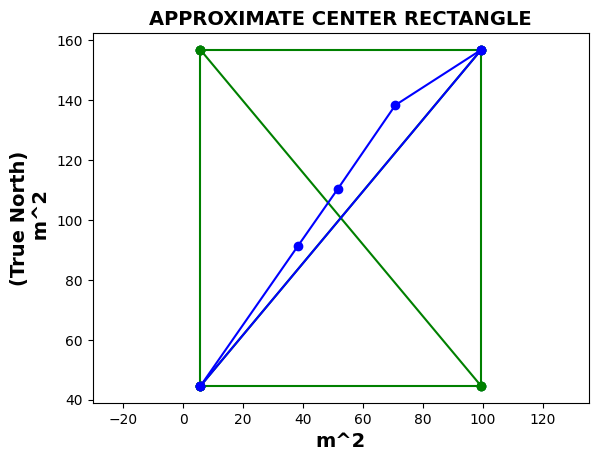

In [22]:
#RECTANGLE RULES
#THE HEIGHT OF THE RECTANGLE IS ALWAYS PARALLEL TO TN
#THE WIDTH OF THE RECTANGLE IS ALWAYS PARALLEL TO THE X AXIS (PREPENDICULAR TO TN)

#RECTANGLE IS MADE UP OF 4 VERTICIES
y_max = max(coordinates_xy[1,:])
y_min = min(coordinates_xy[1,:])

x_max = max(coordinates_xy[0,:])
x_min = min(coordinates_xy[0,:])

#the points of the rectangle are always drawn clockwise from the top left:
# thats of the form (y_max, x_min), (y_max, x_min),(y_min, x_max),(y_min, x_min) 
rect_x = [x_min, x_max, x_max, x_min]
rect_y= [y_max, y_max, y_min, y_min]
rect_points = [rect_x, rect_y]
rect_points = np.array(rect_points)

#print(np.shape(rect_points))
#print(y_min)

#See the Rectangle
x_values_rect = rect_x
y_values_rect = rect_y
plt.scatter(x_values_rect,y_values_rect , marker='o')

# See/VISUALIZE THE CENTER

#PLOT THE RECTANGLES
plt.plot([x_values_rect[0],x_values_rect[2]],[y_values_rect[0],y_values_rect[2]] , marker='o', color='green')
plt.plot([x_values_rect[-1],x_values_rect[1]],[y_values_rect[-1],y_values_rect[1]] , marker='o', color='green')

#PLOT THE DIAGONALS
plt.plot(rect_x, rect_y, color='green',marker='o')
plt.plot([rect_x[-1],rect_x[0]], [rect_y[-1],rect_y[0]], color='green', marker='o' )


#Show Where in the Shape the Center is
plt.plot(x_values,y_values, color='blue' , marker='o')
plt.plot([x_values[-1],x_values[0]], [y_values[-1],y_values[0]], color='blue', marker='o' )



#LABLES
plt.xlabel('m^2', fontsize=14, fontweight='bold')
plt.ylabel('(True North)\n m^2', fontsize=14, fontweight='bold')
plt.title('APPROXIMATE CENTER RECTANGLE', fontsize=14, fontweight='bold')
plt.axis('equal') 

#TRIG

#Draw lines through the 2 opposite corners of the rectangle
#top-left to bottom right
print(rect_points[:,0])
rect_cross_1 = line_equation_finder(rect_points[:,0],rect_points[:,2])
rect_cross_2 = line_equation_finder(rect_points[:,1],rect_points[:,-1])

#print(rect_cross_1) # (m,b)
#print(rect_cross_2) # (m,b)

# FIND THE INTERSECTION OF THE POINTS
rect_center = find_intersection(rect_cross_1, rect_cross_2) # (x,y)
approx_center = rect_center

#DISPLAY THE OUTPUTS
print(f'APPROXIMATE CENTER = {approx_center}')
#ADD THE CENTER COORDINATE
#plt.plot(approx_center[0],approx_center[1], color='RED' , marker='o')

#show the center point and triangles




# Forming the Triangles and Calculating the Areas

In [25]:
#finding the distances from the vertices to the center

#print(coordinates_xy[0,:]) # ALL VERTICES
vetx_to_center_line_distances = []

for i in range(0,len(coordinates_xy[0,:])):
    vetx_to_center_line_distances.append(distance_finder(coordinates_xy[:,i],approx_center))

#Change to np.array
vetx_to_center_line_distances = np.array(vetx_to_center_line_distances)

#See
#print(f'Vertex to Center Line Distances: {vetx_to_center_line_distances}') # (m,b)

# Calcualting the Areas of the Triangles
# Starting from A onwards:

A_i = [] # To store the area of each triangle in the square

for j in range(len(side_length)):
    if j == len(side_length)-1:
        A_i.append(triangle_area_finder_heron(vetx_to_center_line_distances[j],vetx_to_center_line_distances[0], side_length[j]))
    else:
        A_i.append(triangle_area_finder_heron(vetx_to_center_line_distances[j],vetx_to_center_line_distances[j+1], side_length[j]))

#Using the Shoelace Formula

Area_gauss = []
Area_gauss.append(shoelace_formula(coordinates_xy[0,:], coordinates_xy[1,:])) # m^2
Area_gauss = np.sum(np.array(Area_gauss))

# Convert to np.array
A_i = np.array(A_i)
print(np.shape(A_i))


#See the sum
A_total_m = sum(A_i) # m^2
#print(A_total)

# Convert to Achers

# m^2 to acres converstion factor:
m_to_acers = 0.00024711

# m^2 to hectares converstion factor:
m_to_hectares = 0.0001

# Calcualte
A_total_acers = m_to_acers*A_total_m

A_total_hectares = m_to_hectares*A_total_m

decimal_places = 3

# Show
print(f'\nGAUSS METHOD DISTANCES:')
print(f'AREA OF LAND = {np.round(Area_gauss, decimals=decimal_places)} m^2')
print(f'AREA OF LAND = {np.round(Area_gauss*m_to_acers, decimals=decimal_places)} ACERS')
print(f'AREA OF LAND = {np.round(Area_gauss*m_to_hectares, decimals=decimal_places)} HECTARES')

print(f'\n\nRECTANGLE (HERON) METHOD DISTANCES:')
print(f'AREA OF LAND = {np.round(A_total_m, decimals=decimal_places)} m^2')
print(f'AREA OF LAND = {np.round(A_total_acers, decimals=decimal_places)} ACERS')
print(f'AREA OF LAND = {np.round(A_total_hectares, decimals=decimal_places)} HECTARES')


Error in triangle formulation: a = 73.0001320108052 and s = 67.48327430710492, Thus a > s

Error in triangle formulation: c = 57.0 and s = 41.811208078987626, Thus c > s

Error in triangle formulation: b = 41.796136529236655 and s = 37.22606804190364, Thus b > s
(5,)

GAUSS METHOD DISTANCES:
AREA OF LAND = 732.149 m^2
AREA OF LAND = 0.181 ACERS
AREA OF LAND = 0.073 HECTARES


RECTANGLE (HERON) METHOD DISTANCES:
AREA OF LAND = nan m^2
AREA OF LAND = nan ACERS
AREA OF LAND = nan HECTARES


C:\Users\nawau\AppData\Local\Temp\ipykernel_30960\413675284.py:58: RuntimeWarning: invalid value encountered in sqrt
  Area_heron = np.sqrt(s*(s-a)*(s-b)*(s-c))


(1.1491060044952128, 104.09033272209965, 39.017782022035334, 162.288042531513)

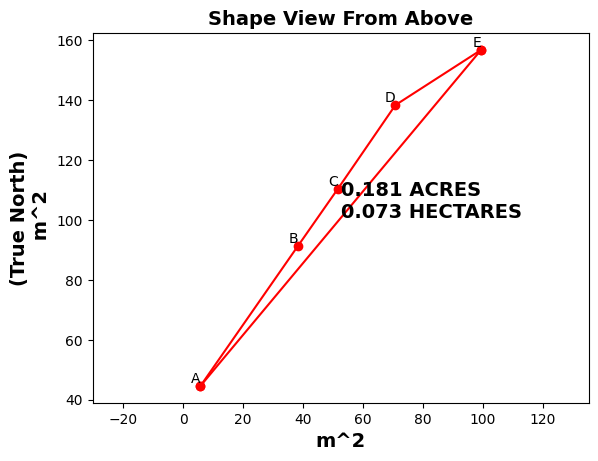

In [24]:
#Plot the land area points for sanity check
x_values = coordinates_xy[0,:]
y_values = coordinates_xy[1,:]

plt.plot(x_values,y_values, color='RED' , marker='o')
plt.plot([x_values[-1],x_values[0]], [y_values[-1],y_values[0]], color='RED', marker='o' )

# Adding labels for each point
for label, x, y in zip(vetx_name, x_values, y_values):
    plt.text(x, y, label, ha='right', va='bottom')

# Specify the coordinates for the text
text_x = approx_center[0]
text_y = approx_center[1]

# Specify the text content
#text_content = f"{np.round(A_total_acers, decimals=decimal_places)} ACRES (RECT)"
text_content_gauss_A = f"{np.round(Area_gauss*m_to_acers, decimals=decimal_places)} ACRES \n{np.round(Area_gauss*m_to_hectares, decimals=decimal_places)} HECTARES"


# Add text to the plot at the specified coordinates with formatting

#plt.text(text_x, text_y, text_content, fontsize=14, fontweight='bold')
plt.text(text_x, text_y, text_content_gauss_A, fontsize=14, fontweight='bold')


# Adding labels and title
# Reverse the x-axis direction
plt.xlabel('m^2', fontsize=14, fontweight='bold')
plt.ylabel('(True North)\n m^2', fontsize=14, fontweight='bold')
plt.title('Shape View From Above', fontsize=14, fontweight='bold')
plt.axis('equal')